In [1]:
import torch

from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

X, Y = datasets.load_breast_cancer(return_X_y=True)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, stratify=Y, random_state=123)

X_train, X_test, Y_train, Y_test = torch.tensor(X_train, dtype=torch.float32),torch.tensor(X_test, dtype=torch.float32),torch.tensor(Y_train, dtype=torch.long),torch.tensor(Y_test, dtype=torch.long)

samples, features = X_train.shape
classes = Y_test.unique()
print(features)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean)/ std
X_test = (X_test - mean)/ std

from torch import nn

class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.first_layer = nn.Linear(features, 5)
        self.second_layer = nn.Linear(5, 10)
        self.third_layer = nn.Linear(10, 15)
        self.fourth_layer = nn.Linear(15,20)
        self.fifth_layer = nn.Linear(20,25)
        self.final_layer = nn.Linear(25,2)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, X_batch):
        layer_out = self.relu(self.first_layer(X_batch))
        layer_out = self.relu(self.second_layer(layer_out))
        layer_out = self.relu(self.third_layer(layer_out))
        layer_out = self.relu(self.fourth_layer(layer_out))
        layer_out = self.relu(self.fifth_layer(layer_out))

        return self.softmax(self.final_layer(layer_out))

classifier = Classifier()
preds = classifier(X_train[:5])
print(preds)
testlos=[]
trainlos=[]
def TrainModel(model, loss_func, optimizer, X, Y, epochs=500):
    for i in range(epochs):
        preds = model(X) ## Make Predictions by forward pass through network
        loss = loss_func(preds, Y) ## Calculate Loss
        optimizer.zero_grad() ## Zero weights before calculating gradients
        loss.backward() ## Calculate Gradients
        optimizer.step() ## Update Weights
        if i % 100 == 0: ## Print MSE every 100 epochs
            print("NegLogLoss : {:.2f}".format(loss))

from torch.optim import SGD
torch.manual_seed(42) ##For reproducibility.This will make sure that same random weights are initialized each time.
epochs = 2000
learning_rate = torch.tensor(1/1e2) # 0.01

classifier = Classifier()
nll_loss = nn.NLLLoss()
optimizer = SGD(params=classifier.parameters(), lr=learning_rate)

TrainModel(classifier, nll_loss, optimizer, X_train, Y_train, epochs=epochs)

test_preds = classifier(X_test) ## Make Predictions on test dataset

test_preds = torch.argmax(test_preds, axis=1) ## Convert Probabilities to class type

train_preds = classifier(X_train) ## Make Predictions on train dataset

train_preds = torch.argmax(train_preds, axis=1) ## Convert Probabilities to class type

test_preds[:5], train_preds[:5]

from sklearn.metrics import accuracy_score

print("Train Accuracy : {:.2f}".format(accuracy_score(Y_train, train_preds)))
print("Test  Accuracy : {:.2f}".format(accuracy_score(Y_test, test_preds)))

from sklearn.metrics import classification_report

print("Test Data Classification Report : ")
print(classification_report(Y_test, test_preds))

30
torch.Size([455, 30]) torch.Size([114, 30]) torch.Size([455]) torch.Size([114])
tensor([[0.4227, 0.5773],
        [0.4224, 0.5776],
        [0.4226, 0.5774],
        [0.4228, 0.5772],
        [0.4228, 0.5772]], grad_fn=<SoftmaxBackward0>)
NegLogLoss : -0.50
NegLogLoss : -0.51
NegLogLoss : -0.53
NegLogLoss : -0.54
NegLogLoss : -0.55
NegLogLoss : -0.56
NegLogLoss : -0.57
NegLogLoss : -0.58
NegLogLoss : -0.58
NegLogLoss : -0.59
NegLogLoss : -0.59
NegLogLoss : -0.60
NegLogLoss : -0.60
NegLogLoss : -0.61
NegLogLoss : -0.61
NegLogLoss : -0.61
NegLogLoss : -0.61
NegLogLoss : -0.61
NegLogLoss : -0.61
NegLogLoss : -0.62
Train Accuracy : 0.63
Test  Accuracy : 0.63
Test Data Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.63      1.00      0.77        72

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40    

c:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SAIRAM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


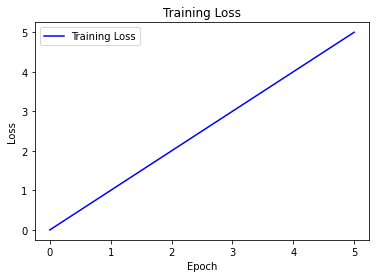

In [1]:
import matplotlib.pyplot as plt
epochs = range(len(train_preds))

plt.plot(epochs, 'b', label='Training Loss')

plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()

plt.show()
